<a href="https://colab.research.google.com/github/smnizza/machine-learning-guide/blob/main/USL_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering – Pengelompokan Berbasis Hirarki

Hierarchical Clustering adalah metode **unsupervised learning** yang mengelompokkan data ke dalam struktur **hirarki** berdasarkan kemiripan antar data.

## Jenis Hierarchical Clustering
1. **Agglomerative (Bottom-Up)**  
   - Mulai dari setiap data sebagai **cluster sendiri**.
   - Gabungkan pasangan cluster terdekat hingga hanya tersisa satu cluster utama.

2. **Divisive (Top-Down)**  
   - Mulai dari satu **cluster besar**.
   - Secara bertahap pisahkan data menjadi sub-cluster yang lebih kecil.

## Kelebihan dan Kekurangan Hierarchical Clustering
✅ **Kelebihan**:
- Tidak perlu menentukan jumlah cluster di awal.
- Hasil dapat divisualisasikan dengan **dendrogram**.

❌ **Kekurangan**:
- Tidak efisien untuk dataset besar.
- Keputusan penggabungan atau pemisahan bersifat permanen.

## Implementasi Hierarchical Clustering
Kita akan menggunakan dataset **Iris** untuk melakukan clustering berdasarkan fitur bunga.

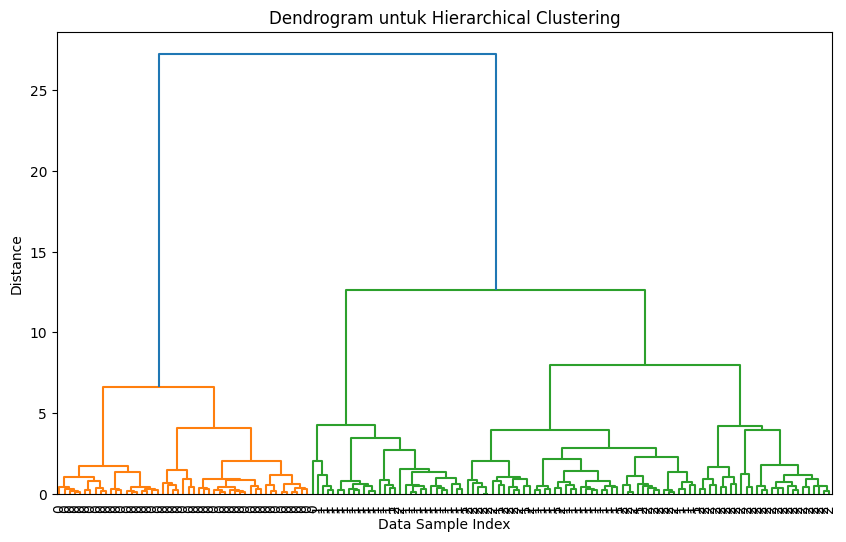

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load dataset Iris
iris = load_iris()
X = iris.data

# Normalisasi data agar memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat Hierarchical Clustering dengan metode Ward
Z = linkage(X_scaled, method='ward')

# Visualisasi Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=iris.target, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram untuk Hierarchical Clustering")
plt.xlabel("Data Sample Index")
plt.ylabel("Distance")
plt.show()

## Menentukan Jumlah Cluster Optimal
Kita bisa menentukan jumlah cluster dengan melihat dendrogram dan memotongnya pada jarak tertentu.

In [2]:
# Potong dendrogram untuk mendapatkan 3 cluster
k = 3
clusters = fcluster(Z, k, criterion='maxclust')

# Tambahkan hasil clustering ke dalam DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df["Cluster"] = clusters

# Tampilkan jumlah data dalam setiap cluster
df["Cluster"].value_counts()

,count
Cluster,
3,71
1,49
2,30


## Visualisasi Hasil Clustering
Karena dataset memiliki 4 fitur, kita akan menggunakan **Principal Component Analysis (PCA)** untuk mereduksi dimensi ke 2D.

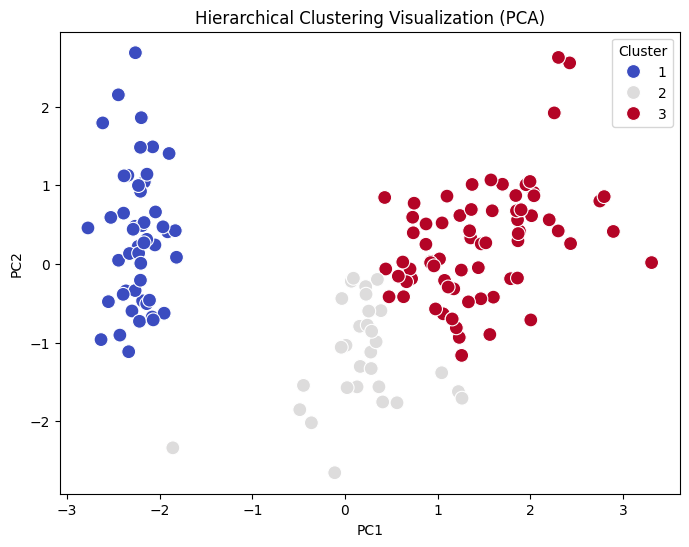

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = clusters

# Plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="coolwarm", s=100)
plt.title("Hierarchical Clustering Visualization (PCA)")
plt.show()

## Kesimpulan
- Hierarchical Clustering mengelompokkan data **tanpa harus menentukan jumlah cluster di awal**.
- **Dendrogram** membantu menentukan jumlah cluster optimal.
- Algoritma ini cocok untuk **dataset kecil hingga menengah** dengan struktur cluster yang jelas.

### **Kapan Menggunakan Hierarchical Clustering?**
- Jika ingin **memahami hubungan antar data** melalui **dendrogram**.
- Jika jumlah cluster **tidak diketahui sebelumnya**.
- Jika ingin menganalisis **data genetik, segmentasi pelanggan, atau pola sosial**.

### **Pengembangan Lebih Lanjut**
- **Mencoba metode pengelompokan lain** seperti K-Means atau DBSCAN.
- **Menggunakan metrik jarak yang berbeda**, seperti Euclidean atau Cosine.
- **Hierarchical Clustering untuk analisis jaringan sosial**.